In [1]:
from scipy.special import beta
from scipy.special import gamma
import math
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from pylab import MaxNLocator
from openpyxl import load_workbook
import openpyxl
import time
from tqdm import tqdm
from matplotlib import rcParams

config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


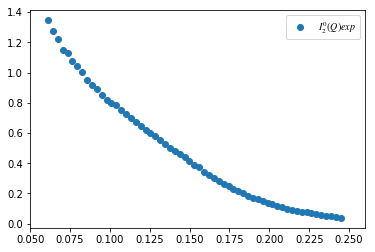

100%|██████████| 18/18 [01:08<00:00,  3.39s/it]


<Figure size 432x288 with 0 Axes>

In [22]:
#Strain = 0.5;strain1 = 0.501385;strain0 = 0.501023
Strain = 0.6;strain1 = 0.601461;strain0 = 0.601031
#Strain = 0.8;strain1 = 0.801041;strain0 = 0.801021
#Strain = 0.9;strain1 = 0.901386;strain0 = 0.901002
#Strain = 1.8;strain1 = 1.801379;strain0 = 1.801002
#Strain = 1.4;strain1 = 1.401286;strain0 = 1.401002;
#Strain = 1.3;strain1 = 1.301338;strain0 = 1.301002;
#Strain = 1.6;strain1 = 1.601243;strain0 = 1.601002;
path = 'C:/Users/Lenovo/Desktop/大四下/毕设/CODE/dp_crystmorph/regionI_double_peak/store_result_params/'
file_name = path+str(Strain)+'.xlsx'
val = pd.read_excel(file_name,skiprows='None',header=None
)
params = val.values

Q = params[0,1:]
S = params[1:4,1:]
a = Q.T
#plt.plot(Q,S)
plt.plot(Q,S[1].T,'o',label='$I_2^0(Q)exp$')
plt.xlim(0.05,0.26)
plt.legend(loc='upper right')
plt.show()
for i in tqdm(range(2,int((params.shape[0]-4)/3+2))):
#for i in tqdm(range(2,3)):
    begin = 6
    Q = params[0,begin:]
    S = params[1:4,begin:]
    Scal = params[(i*3-2):(i*3+1),begin:]
    plt.plot(Q,S[0],'o',label='$I_2^0(Q)exp$')
    plt.plot(Q,S[1],'o',label='$I_4^0(Q)exp$')
    plt.plot(Q,S[2],'o',label='$I_6^0(Q)exp$')
    plt.plot(Q,Scal[0],label='$I_2^0(Q)fit$')
    plt.plot(Q,Scal[1],label='$I_4^0(Q)fit$')
    plt.plot(Q,Scal[2],label='$I_6^0(Q)fit$')
    plt.xlabel("$Q/nm^{-1}$")
    plt.ylabel("$I_k^0(Q)$")
    plt.title("Strain="+str(Strain)+" "+ "NO:"+str(i))
    
    plt.legend()
    #plt.show()
    plt.savefig('store_all_figure/'+str(Strain)+'/'+str(Strain)+'_'+str(i)+'.png',dpi=500)
    plt.clf()
# for i in range(0,3):
#     x=np.linspace(-4,4,30)
#     y=np.sin(x)
#     plt.plot(x,i*y,'--*b')
#     plt.savefig('store_all_figure/'+str(Strain)+'/'+str(Strain)+'_'+str(i)+'.png')
#     plt.clf()



In [2]:
D0w = 12.73
nuDw = 278.7
D0n = 10.2
nuDn = 149.7
T0 = 2.058
nuT = 199
Dw = D0w * gamma(0.5) / beta(nuDw,0.5)
sigmaDw = math.sqrt(nuDw*D0w*D0w - Dw*Dw)
Dn = D0n * gamma(0.5) / beta(nuDn,0.5)
sigmaDn = math.sqrt(nuDn*D0n*D0n - Dn*Dn)
T = T0 * gamma(0.5) / beta(nuT,0.5)
sigmaT = math.sqrt(nuT*T0*T0 - T*T)

print(Dw)
print(Dn)
print(T)


212.4232760125625
124.69482649504954
29.013432422515773


In [149]:
a = 1
choice_05 = [2,8,11,14]
choice_06 = [3,4,6,8,12,14,16]
choice_09 = [2,4,7,17,24,28]
choice_14 = [11,19,20]
choice_16 = [3,4,6]
def save_plot(no,a):
    strain = [0.5,0.6,0.9,1.4,1.6,1.8,2.5]
#no_params = [8,13,25,10,3,3,2]#sheet=1
#no_params = [14,15,25,20,3,3,2]#sheet=2
#no_params = [14,15,25,20,3,4,2]#sheet=3
#no_params = [14,15,25,20,4,4,2]#sheet=4
    no_params = no#sheet=5
    sheet_name = "1"
    store_params = np.zeros((7,8))
    for i in range(0,len(strain)):
        excel_name = "excel_params/"+str(strain[i])+"_params.xlsx"
        val = pd.read_excel(excel_name)
        params = val.values
        Kw = params[no_params[i]-2,2]
        Kn = params[no_params[i]-2,5]
        D0w = params[no_params[i]-2,3]
        nuDw = params[no_params[i]-2,4]
        D0n = params[no_params[i]-2,6]
        nuDn = params[no_params[i]-2,7]
        T0 = params[no_params[i]-2,8]
        nuT = params[no_params[i]-2,9]
        L = params[no_params[i]-2,10]
        sigma_beta = params[no_params[i]-2,12]
        N = params[no_params[i]-2,13]
        Dw = D0w * gamma(0.5) / beta(nuDw,0.5)
        Dn = D0n * gamma(0.5) / beta(nuDn,0.5)
        T = T0 * gamma(0.5) / beta(nuT,0.5)
        store_params[i] = np.array([Kw,Kn,Dw,Dn,T,L,sigma_beta,N])
        #print(params[no_params[i]-2])

    Kw=np.array(store_params[:,0])
    Kn=np.array(store_params[:,1])
    Dw=np.array(store_params[:,2])
    Dn=np.array(store_params[:,3])
    T=np.array(store_params[:,4])
    L=np.array(store_params[:,5])
    sigma_beta=np.array(store_params[:,6])
    N=np.array(store_params[:,7])
    k = []
    for i in range(0,len(strain)):
        k.append(Kw[i]/Kn[i])
    # Dw = params[:,1]
    # Dn = params[:,0]
    y_max = 250
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(strain,Dw.T,color="cyan", linewidth=3.5, linestyle="-",label="Dw")
    ax1.plot(strain,Dn.T,color="red", linewidth=3.5, linestyle="-",label="Dn")
    plt.xlabel("Q")
    ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
    for i in range(0,len(strain)):
        ax1.text(strain[i],Dw[i],round(Dw[i],1),ha='center', va= 'bottom')
        ax1.text(strain[i],Dn[i],round(Dn[i],1),ha='center', va= 'bottom')
        ax1.text(strain[i],y_max,strain[i],ha='center',va='bottom')
    ax1.vlines(strain,0,y_max,color='orange',linestyle='-.')
    plt.ylim((0,y_max))
    ax2 = ax1.twinx()
    ax2.plot(strain,k, 'k-',label='Kw/Kn')
    plt.ylabel("Kw/Kn")
    ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
    plt.savefig('figure_test/'+str(a)+'.png')
    plt.clf()
# a = 0
# for i1 in range(0,len(choice_05)):
#     for i2 in range(0,len(choice_06)):
#         for i3 in range(0,len(choice_09)):
#             for i4 in range(0,len(choice_14)):
#                 for i5 in range(0,len(choice_16)):
#                     a = a+1
#                     save_plot([i1,i2,i3,i4,i5,4,2],a)



ValueError: Axis limits cannot be NaN or Inf

# the block for plot test

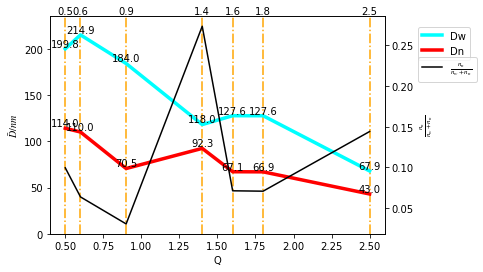

In [35]:
strain = [0.5,0.6,0.9,1.4,1.6,1.8,2.5]
#no_params = [8,13,25,10,3,3,2]#sheet=1
#no_params = [14,15,25,20,3,3,2]#sheet=2
#no_params = [14,15,25,20,3,4,2]#sheet=3
#no_params = [14,15,25,20,4,4,2]#sheet=4
#no_params = [14,10,27,13,8,4,2]#sheet=5
no_params = [14,10,27,13,8,4,2]
sheet_name = "1"
store_params = np.zeros((7,8))
k = []
for i in range(0,len(strain)):
    excel_name = "excel_params/"+str(strain[i])+"_params.xlsx"
    v_excel = "excel_params/"+str(strain[i])+"_v2av.xlsx"

    val = pd.read_excel(excel_name)
    v_val = pd.read_excel(v_excel)
    
    params = val.values
    v_para = v_val.values
   
    k.append(v_para[no_params[i]-2,3])
    Kw = params[no_params[i]-2,2]
    Kn = params[no_params[i]-2,5]
    D0w = params[no_params[i]-2,3]
    nuDw = params[no_params[i]-2,4]
    D0n = params[no_params[i]-2,6]
    nuDn = params[no_params[i]-2,7]
    T0 = params[no_params[i]-2,8]
    nuT = params[no_params[i]-2,9]
    L = params[no_params[i]-2,10]
    sigma_beta = params[no_params[i]-2,12]
    N = params[no_params[i]-2,13]
    Dw = D0w * gamma(0.5) / beta(nuDw,0.5)
    Dn = D0n * gamma(0.5) / beta(nuDn,0.5)
    T = T0 * gamma(0.5) / beta(nuT,0.5)
    store_params[i] = np.array([Kw,Kn,Dw,Dn,T,L,sigma_beta,N])
    #print(params[no_params[i]-2])

Kw=np.array(store_params[:,0])
Kn=np.array(store_params[:,1])
Dw=np.array(store_params[:,2])
Dn=np.array(store_params[:,3])
T=np.array(store_params[:,4])
L=np.array(store_params[:,5])
sigma_beta=np.array(store_params[:,6])
N=np.array(store_params[:,7])
# k = []
# pp = 3.1415926
# for i in range(0,len(strain)):
#     n_w = Kw[i]/(pp/4*(Dw[i])**2*T[i])**2
#     n_n = Kn[i]/(pp/4*(Dn[i])**2*T[i])**2
#     k.append(n_n/(n_w+n_n))
# Dw = params[:,1]
# Dn = params[:,0]
y_max = np.max(Dw)+20
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(strain,Dw.T,color="cyan", linewidth=3.5, linestyle="-",label="Dw")
ax1.plot(strain,Dn.T,color="red", linewidth=3.5, linestyle="-",label="Dn")
plt.xlabel("Q")
plt.ylabel(r"$\bar{D}/nm$")
ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
for i in range(0,len(strain)):
    ax1.text(strain[i],Dw[i],round(Dw[i],1),ha='center', va= 'bottom')
    ax1.text(strain[i],Dn[i],round(Dn[i],1),ha='center', va= 'bottom')
    ax1.text(strain[i],y_max,strain[i],ha='center',va='bottom')
ax1.vlines(strain,0,y_max,color='orange',linestyle='-.')
plt.ylim((0,y_max))
ax2 = ax1.twinx()
ax2.plot(strain,k, 'k-',label=r'$\frac{n_n}{n_w+n_n}$')
plt.ylabel(r'$\frac{n_n}{n_w+n_n}$')
ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
#plt.savefig('figure/'+sheet_name+'_D.png',dpi=300)
plt.show()

In [8]:
#read data of parameters
#0.5:8,14
#0.6:
#0.9:4
# choice_05 = [2,7,8,10,11,12,14]
# choice_06 = [3,4,6,8,12,14,16]
# choice_09 = [2,3,4,7,8,9,10,11,12,14,16,17,24]
# choice_14 = [11,18,19,20]
# choice_16 = [3,4,6,7,8]
# for i1 in range(0,len(choice_05)):
#     for i2 in range(0,len(choice_06)):
#         for i3 in range(0,len(choice_09)):
#             for i4 in range(0,len(choice_14)):
#                 for i5 in range(0,len(choice_16)):

strain = [0.5,0.6,0.9,1.4,1.6,1.8,2.5]
#no_params = [8,13,25,10,3,3,2]#sheet=1
#no_params = [14,15,25,20,3,3,2]#sheet=2
#no_params = [14,15,25,20,3,4,2]#sheet=3
#no_params = [14,15,25,20,4,4,2]#sheet=4
#no_params = [14,10,27,13,8,4,2]#sheet=5
no_params = [14,10,27,13,8,4,2]#sheet=5
sheet_name = "1"
store_params = np.zeros((7,7))
k = []
for i in range(0,len(strain)):
    excel_name = "excel_params/"+str(strain[i])+"_params.xlsx"
    v_excel = "excel_params/"+str(strain[i])+"_v2av.xlsx"

    val = pd.read_excel(excel_name)
    v_val = pd.read_excel(v_excel)
    
    params = val.values
    v_para = v_val.values
   
    k.append(v_para[no_params[i]-2,3])
    Kw = params[no_params[i]-2,2]
    Kn = params[no_params[i]-2,5]
    D0w = params[no_params[i]-2,3]
    nuDw = params[no_params[i]-2,4]
    D0n = params[no_params[i]-2,6]
    nuDn = params[no_params[i]-2,7]
    T0 = params[no_params[i]-2,8]
    nuT = params[no_params[i]-2,9]
    L = params[no_params[i]-2,10]
    sigma_beta = params[no_params[i]-2,12]
    N = params[no_params[i]-2,13]
    Dw = D0w * gamma(0.5) / beta(nuDw,0.5)
    Dn = D0n * gamma(0.5) / beta(nuDn,0.5)
    T = T0 * gamma(0.5) / beta(nuT,0.5)
    store_params[i] = np.array([v_para[no_params[i]-2,3],Dw,Dn,T,L,sigma_beta,N])
    #print(params[no_params[i]-2])

# Kw=np.array(store_params[:,0])
# Kn=np.array(store_params[:,1])
# Dw=np.array(store_params[:,2])
# Dn=np.array(store_params[:,3])
# T=np.array(store_params[:,4])
# L=np.array(store_params[:,5])
# sigma_beta=np.array(store_params[:,6])
# N=np.array(store_params[:,7])
# k = []
# pp = 3.1415926
# for i in range(0,len(strain)):
#     n_w = Kw[i]/(pp/4*(Dw[i])**2*T[i])**2
#     n_n = Kn[i]/(pp/4*(Dn[i])**2*T[i])**2
#     k.append(n_n/(n_w+n_n))
# Dw = params[:,1]
# Dn = params[:,0]


# y_max = np.max(Dw)+20
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.plot(strain,Dw.T,color="cyan", linewidth=3.5, linestyle="-",label="Dw")
# ax1.plot(strain,Dn.T,color="red", linewidth=3.5, linestyle="-",label="Dn")
# plt.xlabel("Q")
# plt.ylabel(r"$\bar{D}/nm$")
# ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
# for i in range(0,len(strain)):
#     ax1.text(strain[i],Dw[i],round(Dw[i],1),ha='center', va= 'bottom')
#     ax1.text(strain[i],Dn[i],round(Dn[i],1),ha='center', va= 'bottom')
#     ax1.text(strain[i],y_max,strain[i],ha='center',va='bottom')
# ax1.vlines(strain,0,y_max,color='orange',linestyle='-.')
# plt.ylim((0,y_max))
# ax2 = ax1.twinx()
# ax2.plot(strain,k, 'k-',label=r'$\frac{n_n}{n_w+n_n}$')
# plt.ylabel(r'$\frac{n_n}{n_w+n_n}$')
# ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
# #plt.savefig('figure/'+sheet_name+'_D.png',dpi=300)
# plt.show()


dic = {'strain': strain,
    'k':store_params[:,0],
    'Dw':store_params[:,1],
    'Dn':store_params[:,2],
    'T':store_params[:,3],
    'L':store_params[:,4],
    'sigma_beta':store_params[:,5],
    'N':store_params[:,6]
    }
df = pd.DataFrame(dic)
writer = pd.ExcelWriter("excel_params/all_strain.xlsx", engine='openpyxl')
book = openpyxl.load_workbook(writer.path)
writer.book = book
df.to_excel(excel_writer=writer, sheet_name=sheet_name, index=None)
writer.save()
writer.close()

In [6]:

v_excel = "excel_params/"+str(1.8)+"_v2av.xlsx"
v_val = pd.read_excel(v_excel)
v_para = v_val.values
print(v_para[:,3])

[0.04952499 0.05375622 0.07094232]


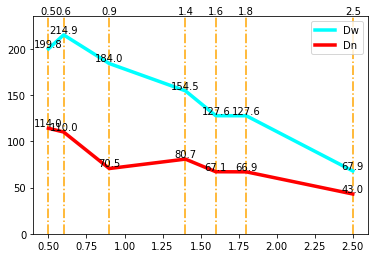

In [28]:
#plot Dw & Dn
val = pd.read_excel("excel_params/all_strain.xlsx",sheetname=sheet_name)
params = val.values

#strain = params[0:7,0]
Dw = params[:,1]
Dn = params[:,0]
y_max = np.max(Dw)+20
plt.plot(strain,Dw,color="cyan", linewidth=3.5, linestyle="-",label="Dw")
plt.plot(strain,Dn,color="red", linewidth=3.5, linestyle="-",label="Dn")
plt.legend()
for i in range(0,len(strain)):
    plt.text(strain[i],Dw[i],round(Dw[i],1),ha='center', va= 'bottom')
    plt.text(strain[i],Dn[i],round(Dn[i],1),ha='center', va= 'bottom')
    plt.text(strain[i],y_max,strain[i],ha='center',va='bottom')
plt.vlines(strain,0,y_max,color='orange',linestyle='-.')
plt.ylim((0,y_max))
plt.savefig('figure/'+sheet_name+'_D.png',dpi=300)
plt.show()



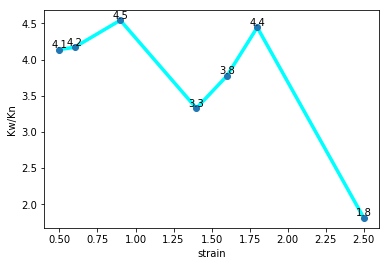

In [9]:
#plot k = Kw/Kn
k = []
for i in range(0,len(strain)):
    k.append(params[i,3]/params[i,2])

plt.plot(strain,k,color="cyan",linewidth=3.5)
plt.plot(strain,k,"o")
plt.xlabel("strain")
plt.ylabel("Kw/Kn")
for i in range(0,len(strain)):
    plt.text(strain[i],k[i],round(k[i],1),ha='center', va= 'bottom')
plt.savefig('figure/'+sheet_name+'_k.png',dpi=300)
plt.show()

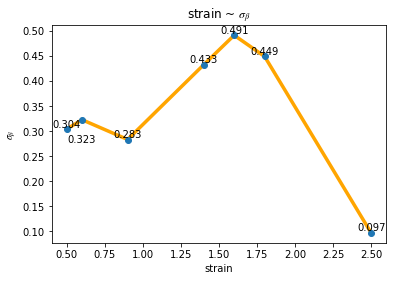

In [29]:
#plot sigma_beta
sigma_beta = params[:,6]
plt.plot(strain,sigma_beta,linewidth=3.5,color="orange")
plt.plot(strain,sigma_beta,"o")
plt.xlabel("strain")
plt.ylabel(r"$\sigma_\beta$")
plt.title(r"strain ~ $\sigma_\beta$")
for i in range(0,len(strain)):
    if i == 1:
        plt.text(strain[i],sigma_beta[i]-0.05,round(sigma_beta[i],3),ha='center', va= 'bottom')
    else :
        plt.text(strain[i],sigma_beta[i],round(sigma_beta[i],3),ha='center', va= 'bottom')
plt.savefig('figure/'+sheet_name+'_beta.png',dpi=300)
plt.show()

In [24]:
T0 = 11.0404843442093127948
nuT = 1.1398822622808217897, 
single_T = np.array([[11.04,1.13988],
                     [8.78968420905916758556, 1.07468476982776284245],
                     [0.797187857636722840837, 111.634458994469468962],
                     [2.494,141.68],
                     [2.92,130.489],
                     [2.362,114.06],
                     [2.05817413353762512784, 198.979356020365514723,]
                       ])
st = np.zeros((7))
for i in range(0,single_T.shape[0]):
    T0 = single_T[i,0]
    nuT = single_T[i,1]
    T = T0 * gamma(0.5) / beta(nuT,0.5)
    sigmaT = math.sqrt(nuT*T0*T0 - T*T)
    st[i] = T 

[0.07036556 1.63223726 1.14971317 0.52996218 1.64740109 1.09374058
 0.59461533 1.64528445 1.12724091 0.52425541 1.63757681 1.10508003
 0.57137879 1.58220234 1.00905821 0.5263026  1.63022801 1.1283742
 0.55212475 1.75631865 1.34729372 0.83311073 1.63580167 1.12855661
 0.55294227 1.55229856 1.14960395 0.70805279 1.64740109 1.09374058
 0.59461533 1.48082619 1.1327438  0.69556834 1.62999176 1.12776703
 0.55581294 1.65685512 1.11277907 0.58026517 1.64919813 1.11618663
 0.58156104 1.64208977 1.1136315  0.57751362 1.64770194 1.11835525
 0.56796533 1.65260597 1.12044542 0.57041442 1.64522487 1.10914912
 0.57071416 1.65581945 1.10121814 0.58005972]


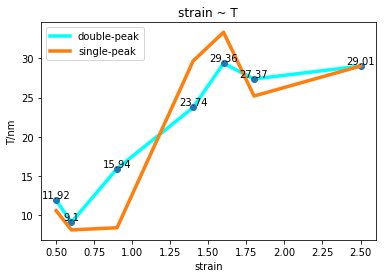

In [34]:
#plot T
T = params[:,4]
plt.plot(strain,T,linewidth=3.5,color="cyan",label="double-peak")
plt.plot(strain,T,"o")
plt.plot(strain,st,linewidth=3.5,label="single-peak")
plt.xlabel("strain")
plt.ylabel("T/nm")
plt.legend(loc = "upper left")
plt.title(r"strain ~ T")
for i in range(0,len(strain)):
    plt.text(strain[i],T[i],round(T[i],2),ha='center', va= 'bottom')
plt.savefig('figure/'+sheet_name+'_T.png',dpi=300)
plt.show()

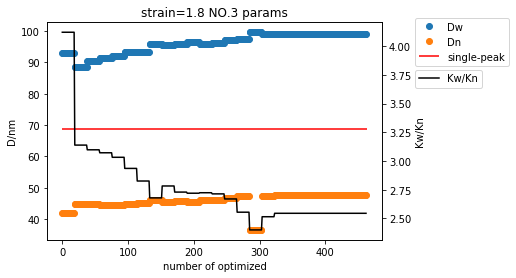

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Dw_array,'o',label='Dw')
ax1.plot(Dn_array, 'o', label='Dn')
ax1.hlines(68.7,0,value.shape[0],'r',label="single-peak")
plt.xlabel("number of optimized")
plt.ylabel("D/nm")
#ax1.legend(loc='center right')
ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
ax2 = ax1.twinx()
ax2.plot(k, 'k-',label='Kw/Kn')
#ax2.legend(loc="center")
ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
plt.ylabel("Kw/Kn")
fig.savefig('1.8-NO3.png', dpi=500,bbox_inches='tight')
plt.title("strain=1.8 NO.3 params")
plt.show()

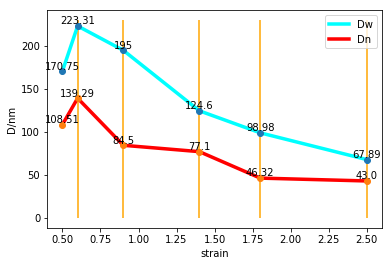

In [2]:
strain = [0.5,0.6,0.9,1.4,1.8,2.5]
Kw = [60.39,31.6,42.8,36.9,30.00,20.926]
Kn = [6.9,26.1,9.42,23.3,11.7,11.561]
Dw = [170.75,223.31,195,124.6,98.98,67.89]
Dn = [108.51,139.29,84.5,77.1,46.32,43.00]
k = []
for i in range(0,6):
    k.append(Kw[i]/Kn[i])
#plt.subplot(2,1,1)
plt.xlabel("strain")
plt.ylabel("D/nm")
plt.plot(strain,Dw,color="cyan", linewidth=3.5, linestyle="-",label="Dw")
plt.plot(strain,Dn,color="red", linewidth=3.5, linestyle="-",label="Dn")
plt.plot(strain,Dw,'o')
plt.plot(strain,Dn,'o')
plt.vlines([0.6,0.9,1.4,1.8,2.5],0,230,color="orange")
plt.legend()
for i in range(0,6):
    plt.text(strain[i],Dw[i],Dw[i],ha='center', va= 'bottom')
    plt.text(strain[i],Dn[i],Dn[i],ha='center', va= 'bottom')
#plt.subplot(2,1,2)
#plt.plot(strain,k)
plt.show()

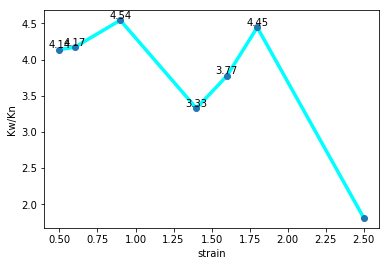

In [11]:
plt.plot(strain,k,color="cyan",linewidth=3.5)
plt.plot(strain,k,"o")
plt.xlabel("strain")
plt.ylabel("Kw/Kn")
for i in range(0,6):
    plt.text(strain[i],k[i],round(k[i],2),ha='center', va= 'bottom')

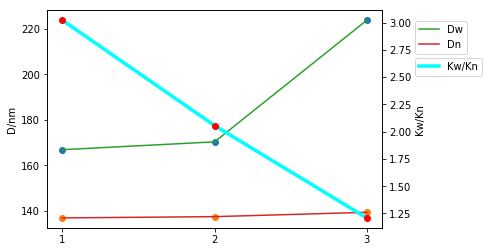

In [63]:
num = [1,2,3]
Dw_06 = [166.82,170.28,223.88]
Dn_06 = [136.75,137.31,139.22]
k = [35.2/11.65,43.09/20.96,31.62/26.15]
# plt.plot(num,DW_06,label="Dw")
# plt.plot(num,Dn_06,label="Dn")
# plt.plot(num,DW_06,"o")
# plt.plot(num,Dn_06,"o")
# plt.ylabel("D/nm")
# plt.legend()
# plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(num,Dw_06,"o")
ax1.plot(num,Dn_06,"o")
ax1.plot(num,Dw_06,label='Dw')
ax1.plot(num,Dn_06, label='Dn')
plt.ylabel("D/nm")
#ax1.legend(loc='center right')
ax1.legend(bbox_to_anchor=(1.1, 0.8), loc=3, borderaxespad=0)
ax2 = ax1.twinx()
ax2.plot(num,k, color="cyan",linewidth=3.5,label='Kw/Kn')
ax2.plot(num,k,"o",color="red")
#ax2.legend(loc="center")
ax2.legend(bbox_to_anchor=(1.1, 0.7), loc=3, borderaxespad=0)
plt.ylabel("Kw/Kn")
ya = ax1.get_xaxis()
ya.set_major_locator(MaxNLocator(integer=True))
plt.show()

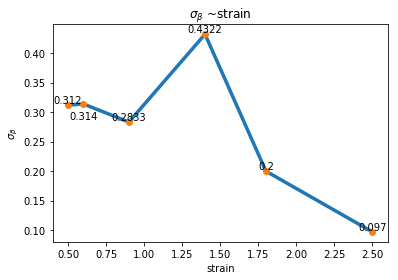

In [25]:
# plot sigma_beta

sigma_beta = [0.312,0.314,0.2833,0.4322,0.200,0.097]
plt.plot(strain,sigma_beta,linewidth=3.5)
plt.plot(strain,sigma_beta,"o")
plt.xlabel("strain")
plt.ylabel(r"$\sigma_\beta$")
plt.title(r"$\sigma_\beta$ ~strain")
for i in range(0,6):
    if i == 1:
        plt.text(strain[i],sigma_beta[i]-0.03,sigma_beta[i],ha='center', va= 'bottom')
    else :
        plt.text(strain[i],sigma_beta[i],sigma_beta[i],ha='center', va= 'bottom')

plt.show()

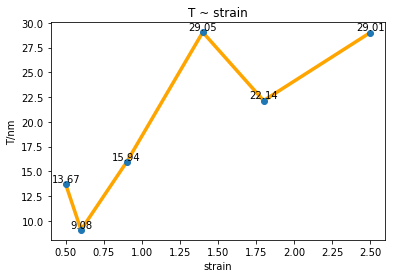

In [27]:
#T ~strain

T = [13.67,9.08,15.94,29.05,22.14,29.01]
plt.plot(strain,T,linewidth=3.5,color="orange")
plt.plot(strain,T,"o")
plt.xlabel("strain")
plt.ylabel("T/nm")
plt.title("T ~ strain")
for i in range(0,6):
    plt.text(strain[i],T[i],T[i],ha='center', va= 'bottom')

In [ ]:
# L ~ strain
